In [3]:
DATASET = '/home/swei20/sketch-scale/data/kmat.xlsx'

In [2]:
import os, sys
import getpass
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import h5py
import copy
import logging

In [98]:
sys.path.insert(0, '../..')

### 1. load data

In [10]:
def load_data(DATASET):
    data = pd.read_excel(DATASET)    
    keep_columns = data.columns[(data.sum()!=0)]
    print(keep_columns)
    return data[keep_columns]    

In [11]:
data = load_data(DATASET)

Index(['k11', 'k12', 'k13', 'k14', 'k21', 'k22', 'k23', 'k24', 'k31', 'k32',
       'k33', 'k34', 'k41', 'k42', 'k43', 'k44', 'k55', 'k56', 'k65', 'k66'],
      dtype='object')


In [12]:
mat = data.values
mat.shape

(6400, 20)

### 2. dim reduction via SVD (PCA)

In [16]:
from sklearn.decomposition import PCA

In [17]:
def get_pca(mat, dim=6):
    pca = PCA(n_components=6)    
    matPca=pca.fit_transform(mat)    
    print(matPca.shape)
    return matPca

In [18]:
matPca = get_pca(mat,dim=6)

(6400, 6)


### 3. clustering

In [38]:
import umap
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns

In [23]:
def get_tsne(matPca):
    outTSNE = TSNE(n_components=2).fit_transform(matPca)
    print(outTSNE.shape)
    return outTSNE

In [40]:
def get_cluster(outTSNE, nCluster):
    kmap = KMeans(n_clusters=nCluster,n_init=30, algorithm='elkan',random_state=1178)
    kmap.fit(outTSNE, sample_weight = None)
    return kmap.labels_ + 1

In [28]:
outTSNE = get_tsne(matPca)

(6400, 2)


In [41]:
nCluster = 10
lbl = get_cluster(outTSNE, nCluster)

In [44]:
def get_out_pd(matPca,outTSNE, lbl):
    mat_pd = pd.DataFrame(matPca,columns = [f'pca{i}' for i in range(1,7)])
    mat_pd['t1'] = outTSNE[:,0]
    mat_pd['t2'] = outTSNE[:,1]
    mat_pd['k'] = lbl
    return mat_pd

In [45]:
mat_pd = get_out_pd(matPca,outTSNE, lbl)

In [42]:
lbl

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [48]:
np.where(lbl==3)[0]

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   67,   68,   69,   70,   71,   72,   73,   74,   75,
         76,   77,   78,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,  147,  148,  149,  150,  151,  152,
        153,  154,  155,  156,  157,  158,  159,  160,  161,  162,  163,
        164,  165,  166,  167,  168,  169,  170,  171,  172,  173,  227,
        228,  229,  230,  231,  232,  233,  234,  235,  236,  237,  238,
        239,  240,  241,  242,  243,  244,  245,  246,  247,  248,  249,
        250,  251,  252,  253,  308,  309,  310,  311,  312,  313,  314,
        315,  316,  317,  318,  319,  320,  321,  322,  323,  324,  325,
        326,  327,  328,  329,  330,  331,  332,  333,  388,  389,  390,
        391,  392,  393,  394,  395,  396,  397,  398,  399,  400,  401,
        402,  403,  404,  405,  406,  407,  408,  409,  410,  411,  412,
        413,  469,  470,  471,  472,  473,  474,  4

In [54]:
for i in range(1,11):
#     c = list(mat_pd[mat_pd['k']==i].index+1)
    c = np.where(lbl==i)[0] +1   
    print(c[:3])
    np.savetxt(f'../../out/kmat_c{i}.txt', c, fmt="%d") 

[1590 1591 1668]
[19 20 21]
[1 2 3]
[1621 1622 1623]
[1652 1653 1654]
[2331 2332 2333]
[31 32 33]
[812 813 814]
[1873 1874 1953]
[14 15 16]


In [ ]:
def get_lbl_idx(lbl)

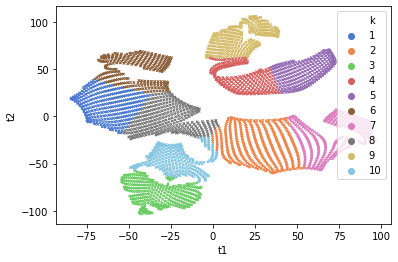

In [46]:
sns.scatterplot(
            x='t1', y='t2',
            hue= 'k' , marker='x',s=5,
            palette=sns.color_palette("muted", nCluster),
            data=mat_pd,
            legend="full")

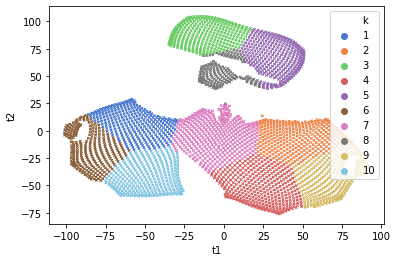

In [147]:
sns.scatterplot(
            x='t1', y='t2',
            hue= 'k' , marker='x',s=5,
            palette=sns.color_palette("muted", N_cluster),
            data=mat_pd,
            legend="full")

In [174]:
os.getcwd()

'/home/swei20/sketch-scale/nb/explore'

In [176]:

for i in range(1,11):
    c = list(mat_pd[mat_pd['k']==i].index+1)
    print(c[:3])
    np.savetxt(f'../../out/c{i}.txt', c, fmt="%d")    

[20, 21, 22]
[80, 710, 711]
[1621, 1622, 1623]
[1056, 1057, 1058]
[1638, 1639, 1640]
[29, 30, 31]
[1, 2, 3]
[159, 2040, 2041]
[2159, 2160, 2161]
[24, 25, 26]


In [162]:
# np.savetxt('c8.txt', c8, delimiter=' ')
np.savetxt('c.txt', c, fmt="%d")

In [158]:
len(c8)

358

In [130]:
sns.scat

,pca1,pca2,pca3,pca4,pca5,pca6,t1,t2,k
0,-0.138574,-7.889492e-13,0.300579,-0.613332,-1.141530e-13,-7.456915e-14,-3.178666,-13.910485,7
1,-0.386611,3.678431e-02,0.024897,-0.825244,8.011921e-03,-8.725821e-03,2.556963,11.240433,7
2,-0.364561,9.010014e-03,0.011831,-0.794359,1.319885e-02,-1.268603e-03,2.585839,13.735167,7
3,-0.371571,-6.269705e-03,0.007580,-0.794364,1.372846e-03,7.387093e-05,0.953780,14.646489,7
4,-0.376140,-1.970535e-02,0.007650,-0.785896,3.304982e-03,1.604008e-03,-1.247897,14.405281,7
...,...,...,...,...,...,...,...,...,...
6395,-0.376140,-1.970535e-02,0.007650,-0.785896,3.304982e-03,1.604008e-03,-1.247897,14.405281,7
6396,-0.371571,-6.269705e-03,0.007580,-0.794364,1.372846e-03,7.387093e-05,0.953735,14.646589,7
6397,-0.364561,9.010014e-03,0.011831,-0.794359,1.319885e-02,-1.268603e-03,2.585838,13.735166,7
6398,-0.386611,3.678431e-02,0.024897,-0.825244,8.011921e-03,-8.725821e-03,2.556963,11.240434,7


In [ ]:
kmap.labels_ + 1 

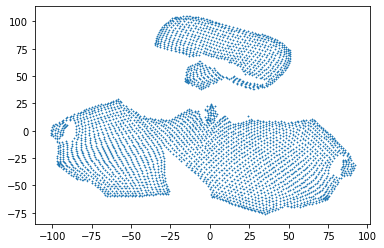

In [121]:
plt.scatter(X_embedded[:,0],X_embedded[:,1],s=0.3)

In [115]:
def get_umap_pd(matPca):
    
    umapT = umap.UMAP(n_components=2,min_dist=0.0,n_neighbors=50, random_state=1178)
    umap_result = umapT.fit_transform(matPca)
    return umap_result

In [116]:
umapT = umap.UMAP(n_components=2,min_dist=0.0,n_neighbors=50, random_state=1178)


In [117]:
umapT.fit(matPca)

TypeError: a bytes-like object is required, not 'list'

In [93]:
umap_result = umapT.fit_transform(matPca)

TypeError: a bytes-like object is required, not 'list'

In [89]:
umaped= get_umap_pd(matPca)

TypeError: a bytes-like object is required, not 'list'

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1],

In [40]:
cov = mat.T.dot(mat)

In [41]:
cov.shape

(17, 17)

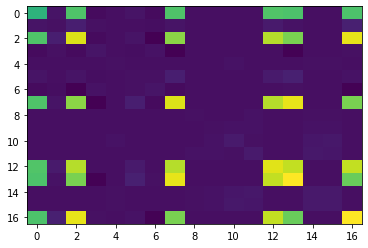

In [42]:
plt.imshow(cov,aspect='auto')

In [ ]:
plt.imshow(np.log(cov),aspect='auto',interpolation ='nearest')

In [31]:
def get_pc(cov,dim):
    # use svd since its commputational faster
    logging.info("=============== PCA: {} ===============".format(dim))
    u,s,v = np.linalg.svd(cov)
    assert np.allclose(u, v.T)
    logging.info('Explained Variance Ratio {}'.format(np.round(s/sum(s),3)))
    pc = u[:,:dim]
    return pc, s

In [43]:
cov.shape

(17, 17)

In [47]:
u,s,v = np.linalg.svd(cov)

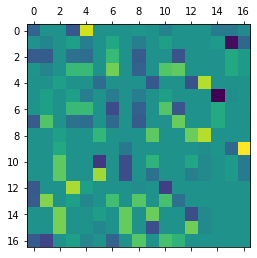

In [48]:
plt.matshow(v.T)

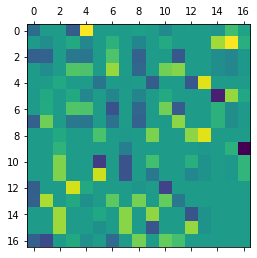

In [49]:
plt.matshow(u)

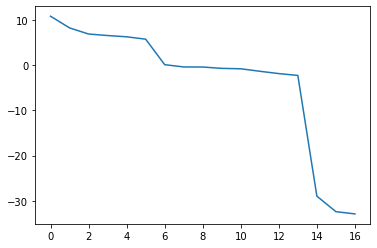

In [51]:
plt.plot(np.log(s))

In [35]:
assert np.allclose(u, v.T)

AssertionError: 

In [32]:
dim=17
get_pc(cov, dim)

AssertionError: 